In [1]:
from functools import partial

import timm
from torch.utils.data import DataLoader
import torch
from torchvision.datasets import FashionMNIST, CIFAR10
from torchvision.transforms import v2
from matplotlib import pyplot as plt
import seaborn as sns

from hw2 import PROJECT_ROOT, CIFAR10_NORMALIZATION
from hw2.models.cnn_basic import LeNet5
from hw2.open_set import one_minus_max_of_prob, entropy_of_prob, one_minus_sum_of_topk_prob, diff_of_logits, \
    energy_score
from hw2.models.mlp import MLP
from hw2.util import validate_on_open_set

In [2]:
transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((32, 32)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(*CIFAR10_NORMALIZATION),
])

mnist_train_loader = DataLoader(
    FashionMNIST(root=PROJECT_ROOT / "data", train=True, download=True, transform=transform),
    batch_size=65536,
    shuffle=False,
)

mnist_test_loader = DataLoader(
    FashionMNIST(root=PROJECT_ROOT / "data", train=False, download=True, transform=transform),
    batch_size=128,
    shuffle=False,
)

cifar10_test_loader = DataLoader(
    CIFAR10(root=PROJECT_ROOT / "data", train=False, download=True, transform=transform),
    batch_size=128,
    shuffle=False,
)

# results = validate_on_cifar10(model, CrossEntropyLoss(), transform, device=torch.device("cuda"), additional_metrics=[partial(metrics.classification_report, digits=4)])
# for metric, value in results.items():
#     print(f"{metric}: {value}")

Files already downloaded and verified


In [6]:
# model = MLP(input_dim=3072, hidden_dims=[3072, 3072, 3072, 3072, 3072], output_dim=10)
# model.load_state_dict(torch.load(PROJECT_ROOT / "models/mlp_3072_3072_3072_3072_3072_3072_10_epoch150.pth"))

# model = MLP(input_dim=3072, hidden_dims=[1024, 512, 256, 128, 64], output_dim=10)
# model.load_state_dict(torch.load(PROJECT_ROOT / "models/mlp_3072_1024_512_256_128_64_10_epoch150.pth"))

# model = LeNet5(channels=3)
# model.load_state_dict(torch.load(PROJECT_ROOT / "models/cnn_basic_0.6042.pth"))

# model = timm.create_model("timm/vit_mediumd_patch16_reg4_gap_384.sbb2_e200_in12k_ft_in1k", pretrained=False)
# # model.strict_img_size = False
# data_config = timm.data.resolve_model_data_config(model)
# transforms = timm.data.create_transform(**data_config, is_training=False)
# def rgb_transforms(image):
#     rgb = v2.RGB()(image)
#     return transforms(rgb)
# model.head = torch.nn.Linear(in_features=model.head.in_features, out_features=10)
# model.load_state_dict(torch.load(PROJECT_ROOT / "models/vit_mediumd_patch16_reg4_gap_384.sbb2_e200_in12k_ft_cifar10.pth"))
#
# plt.figure(figsize=(8, 8))
# plt.plot([0, 1], [0, 1], color="black", linestyle="--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve on ViT")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
#
# open_set_prob_fns = [entropy_of_prob, one_minus_max_of_prob, one_minus_sum_of_topk_prob, partial(one_minus_max_of_prob, softmax=False), partial(one_minus_sum_of_topk_prob, softmax=False), diff_of_logits, energy_score]
# results = validate_on_open_set(model, open_set_prob_fns=open_set_prob_fns, transform=rgb_transforms, device=torch.device("cuda"), thresholds=100)
# labels = ["Entropy", "One minus max prob", "One minus sum of top 3 prob", "One minus max logit", "One minus sum of top 3 logit", "Normalized difference of top 2 logits", "Energy score"]
#
# for i, (fpr, tpr, _) in enumerate(results):
#     sns.lineplot(x=fpr.tolist(), y=tpr.tolist(), label=labels[i])
#
# plt.savefig(PROJECT_ROOT / "artifacts/vit_roc.svg")

C:\Users\ACER\AppData\Local\Temp\ipykernel_66896\2899816749.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PROJECT_ROOT / "models/mlp_3

<All keys matched successfully>

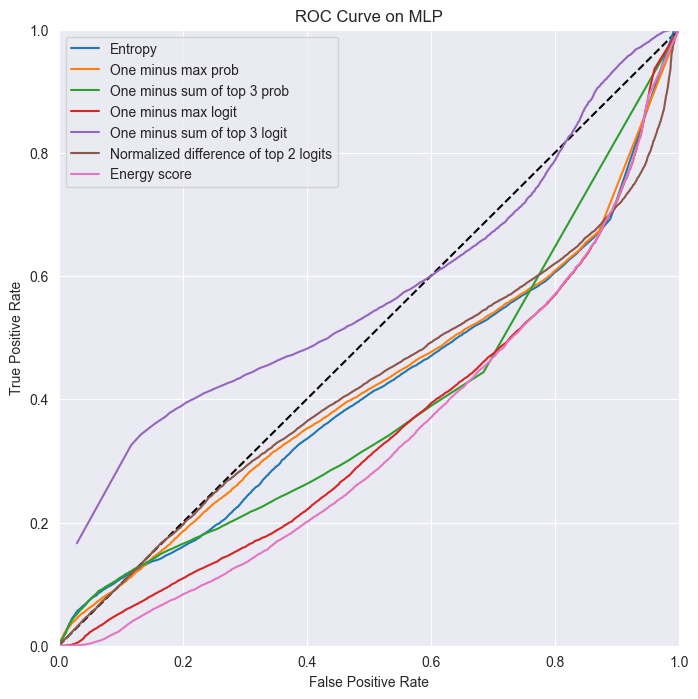

In [8]:
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on MLP")
plt.xlim(0, 1)
plt.ylim(0, 1)

open_set_prob_fns = [entropy_of_prob, one_minus_max_of_prob, one_minus_sum_of_topk_prob, partial(one_minus_max_of_prob, softmax=False), partial(one_minus_sum_of_topk_prob, softmax=False), diff_of_logits, energy_score]
results = validate_on_open_set(model, open_set_prob_fns=open_set_prob_fns, transform=transform, device=torch.device("cuda"), thresholds=5000, mnist_train_loader=mnist_train_loader, mnist_test_loader=mnist_test_loader, cifar10_test_loader=cifar10_test_loader)
labels = ["Entropy", "One minus max prob", "One minus sum of top 3 prob", "One minus max logit", "One minus sum of top 3 logit", "Normalized difference of top 2 logits", "Energy score"]

for i, (fpr, tpr, _) in enumerate(results):
    sns.lineplot(x=fpr.tolist(), y=tpr.tolist(), label=labels[i])

plt.savefig(PROJECT_ROOT / "artifacts/mlp_3072_3072_3072_3072_3072_3072_10_epoch150_roc.svg")

In [13]:
open_set_prob_fns = [entropy_of_prob, one_minus_max_of_prob, one_minus_sum_of_topk_prob, partial(one_minus_max_of_prob, softmax=False), partial(one_minus_sum_of_topk_prob, softmax=False), diff_of_logits, energy_score]
results = validate_on_open_set(model, open_set_prob_fns=open_set_prob_fns, transform=rgb_transforms, device=torch.device("cuda"), thresholds=100)
labels = ["Entropy", "One minus max prob", "One minus sum of top 3 prob", "One minus max logit", "One minus sum of top 3 logit", "Normalized difference of top 2 logits", "Energy score"]

for i, (fpr, tpr, _) in enumerate(results):
    if i in []
    sns.lineplot(x=fpr.tolist(), y=tpr.tolist(), label=labels[i])

plt.savefig(PROJECT_ROOT / "artifacts/vit_roc.svg")

array([[-1.341113  , -0.36624274, -3.458718  , -2.3376815 , -4.4390373 ,
        -4.665305  , -2.2893002 , -4.4243793 , -0.05482233,  2.1901672 ]],
      dtype=float32)